In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import os
import numpy as np
dpi = 50

workdir = '/Users/diana/Dropbox/UW/Research/rasm/project_prep/'

In [4]:
ncfiles = {}
ncfiles['rasm_domain'] = '/Users/diana/Dropbox/UW/Research/rasm/domain.lnd.wr50a_ar9v4.100920.nc'
ncfiles['rasm_masks'] = '/Users/diana/Dropbox/UW/Research/rasm/RASM_VICRVIC_GRID_MASKS_AND_METRICS.nc'

ncdata = {}
ncdata['rasm_domain'] = xr.open_dataset(ncfiles['rasm_domain'])
ncdata['rasm_masks'] = xr.open_dataset(ncfiles['rasm_masks'])

In [5]:
from rasmlib.analysis.plotting import make_bmap, projections, sub_plot_pcolor
# Setup rasmlib plotting
wr50a_map = make_bmap(projection=projections['wr50a'],
                      lons=ncdata['rasm_domain']['xc'].values,
                      lats=ncdata['rasm_domain']['yc'].values)
ncdata['rasm_masks'] = xr.open_dataset(ncfiles['rasm_masks'])
spatial_plot_mask = ncdata['rasm_masks']['mask_active_land'].values < 0.9

In [6]:
def draw_map(lw=0.3):
    wr50a_map.m.drawmapboundary(fill_color=(0.9, 0.9, 0.9))
    wr50a_map.m.fillcontinents(color='white', zorder=0)
    wr50a_map.m.drawparallels(np.arange(-80., 81., 20.), linewidth=lw)
    wr50a_map.m.drawmeridians(np.arange(-180., 181., 20.), linewidth=lw)
    wr50a_map.m.drawcoastlines(color='k', linewidth=lw)

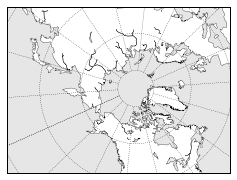

In [8]:
fig = plt.figure(figsize=(4, 4))
draw_map()